In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression 

### Create Data

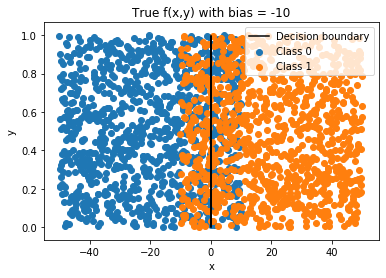

Original X.shape: (2000, 1)
X.shape after adding the labels: (2000, 2)
labels.shape for the labels: (2000,)


In [95]:
Npoints = 1000
bias= np.random.randn(1)
# bias = -10
x1 = np.linspace(-50,-bias,Npoints)
y1 = np.abs(np.random.random(Npoints))
x2 = np.linspace(bias,50,Npoints)
y2 = np.abs(np.random.random(Npoints))
y = np.concatenate((y1,y2))
X = np.concatenate((x1,x2))
plt.scatter(x1,y1,label="Class 0")
plt.scatter(x2,y2,label="Class 1")
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'True f(x,y) with bias = {bias}')
plt.plot(np.zeros(100),np.random.random(100),'k-',label='Decision boundary')
plt.legend()
plt.show()

X = X.reshape((2*Npoints,1))
y = y.reshape((2*Npoints,1))
print(f"Original X.shape: {X.shape}")
X = np.concatenate((X,y),axis=1)
print(f"X.shape after adding the labels: {X.shape}")
labels = np.concatenate((np.zeros(Npoints),np.ones(Npoints)))
print(f"labels.shape for the labels: {labels.shape}")

In [89]:
def sigma(z):
    '''Computes the sigmoid for a numpy array z
    '''
    return 1/(1+np.exp(-z))

In [90]:
def computeGradient(x,y,z):
    '''Computes the gradient for the cross entropy loss function. x,y are (n,) numPy arrays, signifying the 2 features.
       z =  theta0+theta1x+theta2y is an (n,) numPy array. Returns the (3,) gradient at the current iteration.
    '''
    n = x.shape[0]
    sigma_z = sigma(z)
#     print(f"sigma_z: {sigma_z}")
#     print(f"sigma_z.shape: {sigma_z.shape}")
#     estimation_error = (y/sigma_z)-((1-y)/(1-sigma_z))
    estimation_error = sigma_z-y
    term1 = sum(sigma_z*(1-sigma_z)*estimation_error)
    term2 = sum(x*sigma_z*(1-sigma_z)*estimation_error)
    term3 = sum(y*sigma_z*(1-sigma_z)*estimation_error)
    return (np.array([term1,term2,term3]))/n
    
    

In [91]:
def GradientDescent(X,y,start,step_size,tolerance,Niter):    
    ''' Will perform gradient descent on X (nx2), using target y (nx1) 
    '''    
    gradNorm = 10000
    i = 0
    current_theta_estimate = start
    norms = []
    n = X.shape[0]            
    while i<Niter and gradNorm > tolerance:        
        z_estimate = current_theta_estimate[0]+current_theta_estimate[1]*X[:,0] + current_theta_estimate[2]*X[:,1]
#         print(f"z_estimate.shape = {z_estimate.shape}")
#         print(f"z_estimate = {z_estimate}")
        grad = computeGradient(X[:,0],X[:,1],z_estimate)
#         print(f"grad = {grad}")
        gradNorm = np.linalg.norm(grad)
        norms.append(gradNorm)        
        current_theta_estimate = current_theta_estimate - step_size*grad
        i+=1
    plt.plot(np.array(list(range(1,i+1))),norms)
    plt.xlabel('Iterations')
    plt.ylabel('||gradient||')
    plt.grid(True)
    plt.title("Convergence of gradient descent")
    print(f"Started at location {start}")
    print(f"Finished with {i} iterations")
    print(f"Finished with gradient norm = {gradNorm}")
    print(f"Finished at location {current_theta_estimate}")
    return current_theta_estimate
    

In [92]:
def VanillaLogisticRegression(X,y):    
    '''Assumes that the input matrix is an nx2 numPy array with n observations and y is an nx1 target vector 
    '''
    n = X.shape[0]
    theta_estimate_start = np.random.rand(3)
    theta_estimate_start = np.array([0,1,0])
    learning_rate = 1e-6
    err_tolerance = 1e-6
    MaxIter = 1000
    estimated_coeff = GradientDescent(X,y,theta_estimate_start,learning_rate,err_tolerance,MaxIter)
    return estimated_coeff

    
    
    

    
    

Started at location [0 1 0]
Finished with 1000 iterations
Finished with gradient norm = 0.008391209727436124
Finished at location [-1.05305686e-07  9.99991727e-01  1.39936241e-06]
theta estimated [ theta0,theta1, theta2]: [-1.05305686e-07  9.99991727e-01  1.39936241e-06]
Threshold estimated x>thresh: -1.0530655670371743e-07
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
Sum error: 334.0
Error probability : 0.167


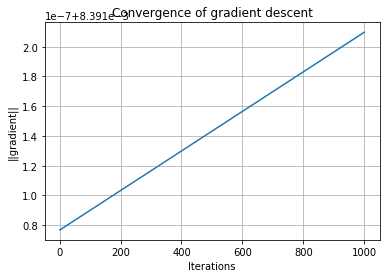

In [96]:
theta_est = VanillaLogisticRegression(X,labels)
threshold_est = theta_est[0]/theta_est[1]
print(f"theta estimated [ theta0,theta1, theta2]: {theta_est}")
print(f"Threshold estimated x>thresh: {threshold_est}")
y_pred_algo = list(map(lambda q: 0 if q<0 else 1,X[:,0]-threshold_est))
print(y_pred_algo[Npoints-5:Npoints+6])
y_pred_algo = np.array(y_pred_algo)
y = y.reshape(2*Npoints)
sumErr = sum(abs(y_pred_algo-labels))
print(f"Sum error: {sumErr}")
errRate = sumErr/(2*Npoints)
print(f"Error probability : {errRate}")